In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [2]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

c:\Users\Niitro_musics\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [5]:
tokens = tokenizer.encode("I hate this, not good product", return_tensors='pt')
#tokenizer.decode(tokens[0])
tokens

tensor([[  101,   151, 39487, 10372,   117, 10497, 12050, 20058,   102]])

In [6]:
result = model(tokens)


In [7]:
result.logits

tensor([[ 4.1248,  2.5392,  0.0575, -2.6209, -3.2040]],
       grad_fn=<AddmmBackward0>)

In [8]:
torch.argmax(result.logits)

tensor(0)

In [9]:
int(torch.argmax(result.logits))+1

1

### collect reviews

In [10]:
r= requests.get('https://www.yelp.com/biz/taco-bell-san-francisco-12')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p',{'class':regex})
reviews = [result.text for result in results]

In [11]:
r.text

'<!DOCTYPE html><html lang="en-US" prefix="og: http://ogp.me/ns#" style="margin: 0;padding: 0; border: 0; font-size: 100%; font: inherit; vertical-align: baseline;"><head><script>document.documentElement.className=document.documentElement.className.replace(/\x08no-js\x08/,"js");</script><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><meta http-equiv="Content-Language" content="en-US" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><link rel="mask-icon" sizes="any" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/b2bb2fb0ec9c/assets/img/logos/yelp_burst.svg" content="#FF1A1A"><link rel="shortcut icon" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/dcfe403147fc/assets/img/logos/favicon.ico"><script> window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;window.ygaPageStartTime=new Date().getTime();</script><script>\n            window.yelp = window.yelp || {};\

### load to dataframe

In [12]:
import pandas as pd
import numpy as np

In [13]:
df = pd.DataFrame(np.array(reviews), columns=['review'])
df

,review
0,Amazing Food! One of the bestGreat service! I ...
1,Tera is the rudest employee there!I don't unde...
2,I recently visited Taco Bell and was extremely...
3,"worst food ever, contact me for resolving this..."
4,If you piss off anyone who works at a Taco Bel...
5,Food here was so bad and service was so shitty...
6,So i went to taco bell for a quick little snac...
7,It gets you what you need. I love how the Taco...
8,We got there the fucking building was closed w...
9,Nobody at a fast food restaurant treats you li...


In [14]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1
    

In [15]:
sentiment_score(df['review'].iloc[0])

5

In [16]:
sentiment_score('piece of shit')

1

In [17]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [60]:
df

,review,sentiment
0,Amazing Food! One of the bestGreat service! I ...,5
1,Gave me diarrhea i felt bad for like 4 hours I...,1
2,"worst food ever, contact me for resolving this...",1
3,If you piss off anyone who works at a Taco Bel...,1
4,It gets you what you need. I love how the Taco...,4
5,Food here was so bad and service was so shitty...,1
6,We got there the fucking building was closed w...,1
7,"The food was great, just needed to heat it up ...",4
8,Good service good food I have been using this ...,4
9,Nobody at a fast food restaurant treats you li...,5


### all in one

In [2]:
df1 = pd.read_csv('../../../datasets/processed/womens_clothing_ecommerce_reviews_balanced.csv')
df = df1.drop(columns='sentiment')
df1['sentiment'] = pd.to_numeric(df1['sentiment'])


NameError: name 'pd' is not defined

In [1]:
r= requests.get('https://www.yelp.com/biz/taco-bell-san-francisco-12')

soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p',{'class':regex})
reviews = [result.text for result in results]


#df = pd.DataFrame(np.array(reviews), columns=['review'])

def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

df['sentiment'] = df['review_body'].apply(lambda x: sentiment_score(x[:512]))
df

NameError: name 'requests' is not defined

### comapare 2 results

In [63]:
def sentiment_to_text(sentiment):
    if sentiment < 3:
        return "Bad"
    elif sentiment > 3:
        return "Exelent"
    else:
        return "Ok"

def sentiment3var_to_text(sentiment):
    if sentiment < 0:
        return "Bad"
    elif sentiment > 0:
        return "Exelent"
    else:
        return "Ok"


In [64]:
df1['sentiment'] = df1['sentiment'].apply(sentiment3var_to_text)
df['sentiment'] = df['sentiment'].apply(sentiment_to_text)

In [65]:
df1=df1.drop(columns='product_category')
df=df.drop(columns='product_category')
display(df1.iloc[4:10],df.iloc[4:10])

,sentiment,review_body
4,Bad,This shirt has absolutely no shape. look caref...
5,Bad,Color is not like photo and fit doesn't work i...
6,Bad,This is a gorgeous print but i found it too f...
7,Bad,I was really excited to get this top in the ma...
8,Bad,I really wanted to like this top but unfortuna...
9,Ok,The top is gorgeous and bohemian like with a l...


,review_body,sentiment
4,This shirt has absolutely no shape. look caref...,Bad
5,Color is not like photo and fit doesn't work i...,Bad
6,This is a gorgeous print but i found it too f...,Ok
7,I was really excited to get this top in the ma...,Bad
8,I really wanted to like this top but unfortuna...,Bad
9,The top is gorgeous and bohemian like with a l...,Bad


,count
sentiment,
Bad,204
Exelent,167
Ok,115


([<matplotlib.patches.Wedge at 0x283842a3090>,
 [Text(0.2743852978648391, 1.0652289464315283, 'Bad'),
  Text(-0.9229247401636688, -0.5985064109880734, 'Excellent'),
  Text(0.8098029954638886, -0.744458936770668, 'Ok')],
 [Text(0.14966470792627587, 0.5810339707808335, '42.0%'),
  Text(-0.5034134946347284, -0.32645804235713094, '34.4%'),
  Text(0.4417107247984846, -0.40606851096581886, '23.7%')])

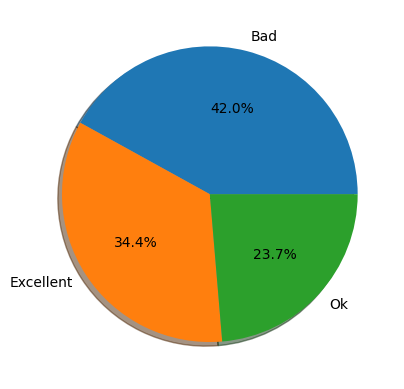

In [82]:
res_lab = pd.DataFrame(df['sentiment'].value_counts()).index.tolist()
res = pd.DataFrame(df['sentiment'].value_counts())

from matplotlib import pyplot as plt

plt.pie(res['count'], labels=['Bad','Excellent','Ok'], autopct='%1.1f%%', shadow=True)


